# Data Science Regression Project

## Data Exploration

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("PH_houses.csv")
df.head()

,Description,Location,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Land_area (sqm),Latitude,Longitude,Link
0,2-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu","15,916,180",2.0,2.0,74.0,NaN,10.3051555,124.011241,https://www.lamudi.com.ph/2-bedroom-unit-for-s...
1,1-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu","8,730,355",1.0,1.0,41.0,NaN,10.3051555,124.011241,https://www.lamudi.com.ph/1-bedroom-unit-for-s...
2,Offices at The Galleon - Prime Unit (11G) for ...,"San Antonio, Pasig","27,448,000",NaN,NaN,82.0,NaN,14.588716,121.060009,https://www.lamudi.com.ph/offices-at-the-galle...
3,1-Bedroom Unit (821) for Sale in Maple at Verd...,"Ugong, Pasig","16,011,000",1.0,NaN,58.0,NaN,14.588882,121.079016,https://www.lamudi.com.ph/1-bedroom-unit-821-f...
4,Alice 2 Storey Townhouse For Sale in Lancaster...,"Tapia, General Trias","1,935,600",3.0,NaN,40.0,40.0,14.35507,120.876425,https://www.lamudi.com.ph/alice-2-storey-townh...


In [3]:
df1 = df.drop(["Description", "Latitude", "Longitude", "Link", "Land_area (sqm)"],axis = "columns")
df1.head()

,Location,Price (PHP),Bedrooms,Bath,Floor_area (sqm)
0,"Mactan, Lapu-Lapu","15,916,180",2.0,2.0,74.0
1,"Mactan, Lapu-Lapu","8,730,355",1.0,1.0,41.0
2,"San Antonio, Pasig","27,448,000",NaN,NaN,82.0
3,"Ugong, Pasig","16,011,000",1.0,NaN,58.0
4,"Tapia, General Trias","1,935,600",3.0,NaN,40.0


In [4]:
df.shape

(1500, 10)

In [5]:
df.groupby("Description")["Description"].agg("count")

Description
1 bedroom Condominium for Sale in Suntrust Capitol Plaza, Diliman, Quezon City              3
1-Bedroom Beach Condo for Sale in Seafront Residences (Seafront Villas), San Juan, Ba...    1
1-Bedroom Condo Unit (10J) for Sale in One Sierra, EDSA, Mandaluyong City, Metro Mani...    2
1-Bedroom Condo Unit (22J) for Sale in One Sierra, EDSA, Mandaluyong City, Metro Mani...    1
1-Bedroom Condo Unit (24A) for Sale in One Sierra, EDSA, Mandaluyong City, Metro Mani...    2
                                                                                           ..
Townhouse Mid Unit for Sale in Ajoya Capas, Tarlac - with Special Offer                     1
Viridian in Greenhills, 2-Bedroom Unit (46H) for Sale in San Juan City                      1
Viridian in Greenhills, 2-Bedroom Unit (50H) for Sale in San Juan City                      1
Viridian in Greenhills, 2-Bedroom Unit (51H) for Sale in San Juan City                      1
YURI 2BR 2-Storey Single Detached for Sale in Id

In [6]:
df1.isnull().sum()

Location              0
Price (PHP)          40
Bedrooms            120
Bath                633
Floor_area (sqm)     58
dtype: int64

In [7]:
df1["Bedrooms"].unique()

array([ 2.,  1., nan,  3.,  5.,  4.])

In [8]:
df1["Bath"].unique()

array([ 2.,  1., nan,  3.,  4.,  5.,  6.])

In [9]:
df1["Location"].unique()

array(['Mactan, Lapu-Lapu', 'San Antonio, Pasig', 'Ugong, Pasig',
       'Tapia, General Trias', 'Highway Hills, Mandaluyong',
       'Oranbo, Pasig', 'Isabang, Tayabas', 'Cupang Proper, Balanga',
       'Barangay 19-B, Davao', 'Cabuco, Trece Martires',
       'Longos, Malolos', 'Buli, Taal', 'Hippodromo, Cebu',
       'Ortigas CBD, Pasig', 'Sapang Palay, San Jose del Monte',
       'Novaliches, Quezon City', 'Sampaloc II, Dasmarinas',
       'Wack-Wack Greenhills, Mandaluyong', 'Talamban, Cebu',
       'Cupang, Muntinlupa', 'Bagong Ilog, Pasig',
       'Maitim 2nd West, Tagaytay', 'Mandalagan, Bacolod',
       'Alabang, Muntinlupa', 'Eastwood City, Quezon City',
       'Gibraltar, Baguio', 'Darasa, Tanauan', 'Paligsahan, Quezon City',
       'Calubcub II, San Juan', 'Bagakay, Ozamiz',
       'Barangka Ilaya, Mandaluyong', 'Bakakeng Central, Baguio',
       'Hulo, Mandaluyong', 'Manggahan, Pasig', 'Talon Uno, Las Pinas',
       'Ermita, Manila', 'Ma-A, Davao', 'Sambag II, Cebu',
      

In [10]:
df1["Floor_area (sqm)"].unique()

array([  74.,   41.,   82.,   58.,   40.,   32.,   46.,   56.,   70.,
         33.,   67.,   66.,  166.,   92.,   57.,   53.,   22.,  100.,
        106.,   36.,   35.,   97.,  142.,   65.,   39.,   34.,   38.,
        104.,   45.,   85.,   54.,   83.,   76.,   68.,   87.,   50.,
         89.,   42.,   84.,  101.,  128.,   73.,  160.,   88.,   30.,
         80.,   24.,   nan,  108.,   27.,   69.,   48.,  112.,   23.,
       1136.,   37.,   60.,   28.,  195.,   75.,   62.,   93.,   29.,
         31.,  174.,   63.,  119.,   18.,  120.,  141.,   20.,  107.,
         55.,  114.,  179.,   19.,   52.,  121.,  237.,  206.,  171.,
         95.,   72.,  102.,   51.,   25.,   90.,  110.,  409.,  123.,
         71.,   77.,   21.,  115.,   49.,   17.,   59.,  150.,   16.,
         26.,   79.,  188.,   96.,  149.,   43.,  136.,  268.,  117.,
        211.,   78.,  176.,  116.,   44.,  103.,  139.,   81.,  241.,
        111.,  167.,   64.,  109.,  147.,   98.,  155.,  250.,  323.,
         47.,   91.,

## Data Preprocessing

In [11]:
df1.rename(columns={'Location': 'location','Price (PHP)': 'price','Bedrooms': 'bhk', 'Bath': 'bath', 'Floor_area (sqm)': 'sqm',},inplace=True)
df1.head()

,location,price,bhk,bath,sqm
0,"Mactan, Lapu-Lapu","15,916,180",2.0,2.0,74.0
1,"Mactan, Lapu-Lapu","8,730,355",1.0,1.0,41.0
2,"San Antonio, Pasig","27,448,000",NaN,NaN,82.0
3,"Ugong, Pasig","16,011,000",1.0,NaN,58.0
4,"Tapia, General Trias","1,935,600",3.0,NaN,40.0


In [12]:
df1.isnull().sum()

location      0
price        40
bhk         120
bath        633
sqm          58
dtype: int64

In [13]:
df1["price"] = df1["price"].str.replace('[\,\.]', '', regex=True)
df1

,location,price,bhk,bath,sqm
0,"Mactan, Lapu-Lapu",15916180,2.0,2.0,74.0
1,"Mactan, Lapu-Lapu",8730355,1.0,1.0,41.0
2,"San Antonio, Pasig",27448000,NaN,NaN,82.0
3,"Ugong, Pasig",16011000,1.0,NaN,58.0
4,"Tapia, General Trias",1935600,3.0,NaN,40.0
...,...,...,...,...,...
1495,"Ortigas CBD, Pasig",11300000,1.0,1.0,NaN
1496,"San Antonio, Pasig",41924000,2.0,2.0,114.0
1497,"Bagumbayan, Quezon City",14278110,2.0,2.0,67.0
1498,"San Antonio, Davao",7320000,1.0,2.0,50.0


In [14]:
df1.describe()

,bhk,bath,sqm
count,1380.000000,867.000000,1442.000000
mean,1.763043,1.331027,70.518724
std,0.975968,0.590529,52.150399
min,1.000000,1.000000,16.000000
25%,1.000000,1.000000,43.000000
50%,1.000000,1.000000,58.000000
75%,2.000000,2.000000,84.000000
max,5.000000,6.000000,1136.000000


In [15]:
df1.dtypes

location     object
price        object
bhk         float64
bath        float64
sqm         float64
dtype: object

In [16]:
# Fill null values using median
df1["bhk"].fillna(df1["bhk"].median(), inplace=True)
df1["bath"].fillna(df1["bath"].median(), inplace=True)
df1["sqm"].fillna(df1["sqm"].median(), inplace=True)
df1["price"].fillna(df1["price"].median(), inplace=True)
df1.head()

,location,price,bhk,bath,sqm
0,"Mactan, Lapu-Lapu",15916180,2.0,2.0,74.0
1,"Mactan, Lapu-Lapu",8730355,1.0,1.0,41.0
2,"San Antonio, Pasig",27448000,1.0,1.0,82.0
3,"Ugong, Pasig",16011000,1.0,1.0,58.0
4,"Tapia, General Trias",1935600,3.0,1.0,40.0


In [17]:
df1.dtypes

location     object
price        object
bhk         float64
bath        float64
sqm         float64
dtype: object

In [18]:
df1["price"] = df1["price"].astype(int)
df1["bath"] = df1["bath"].astype(int)
df1["bhk"] = df1["bhk"].astype(int)
df1["sqm"] = df1["sqm"].astype(int)
df1.dtypes

location    object
price        int32
bhk          int32
bath         int32
sqm          int32
dtype: object

## Feature Engineering

In [19]:
df1['price'].describe()

count    1.500000e+03
mean     1.450201e+07
std      1.289782e+07
min      8.500000e+05
25%      6.087384e+06
50%      1.108800e+07
75%      1.709355e+07
max      1.752650e+08
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqm'>

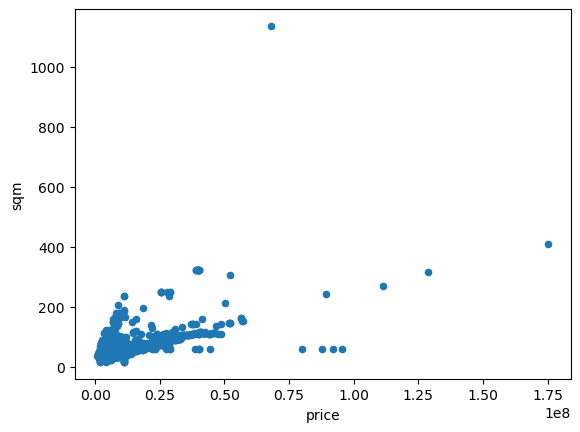

In [20]:
df1.plot(x='price', y='sqm', kind='scatter')

### Outlier Removal using Location
`Removing outliers using mean and one standard deviation`

`First, check the graph to clarify the outliers`

In [21]:
print(df1.bath.unique())
print(df1.bhk.unique())
print(df1.price.std())
print(df1.price.mean())
print(df1.sqm.std())
print(df1.sqm.mean())

[2 1 3 4 5 6]
[2 1 3 5 4]
12897823.25541569
14502008.546666667
51.188504310420285
70.03466666666667


In [23]:
sns.histplot(df1.price, kde=True)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [24]:
sns.histplot(df1.sqm, kde=True)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [26]:
# Creating a function to remove outliers using mean and one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.median(subdf.sqm)
        st = np.std(subdf.sqm)
        reduced_df = subdf[(subdf.sqm>(m-st)) & (subdf.sqm<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

new_df = remove_pps_outliers(df1)

`Check the new dataframe without outliers`

In [27]:
new_df

,location,price,bhk,bath,sqm
0,"Alabang, Muntinlupa",11088000,1,1,36
1,"Alabang, Muntinlupa",11088000,2,2,53
2,"Alabang, Muntinlupa",10000000,2,2,74
3,"Alabang, Muntinlupa",10000000,2,2,74
4,"Alabang, Muntinlupa",11088000,1,1,36
...,...,...,...,...,...
1013,"Wack-Wack Greenhills, Mandaluyong",16088526,1,1,63
1014,"Zapatera, Cebu",3199000,1,1,27
1015,"Zapatera, Cebu",5307970,1,1,40
1016,"Zapatera, Cebu",5029302,1,1,37


In [28]:
sns.histplot(new_df.sqm, kde=True)

AttributeError: module 'seaborn' has no attribute 'histplot'

<Axes: xlabel='price', ylabel='sqm'>

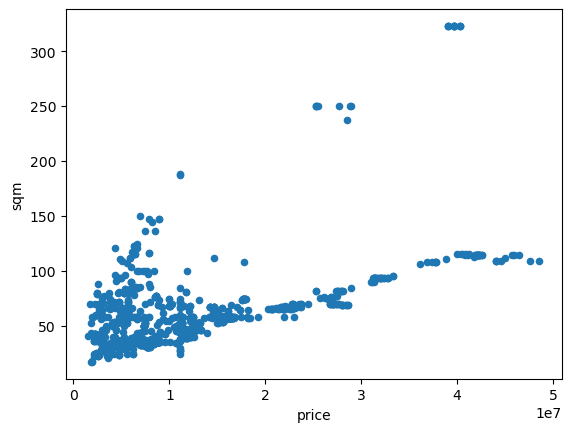

In [29]:
new_df.plot(x='price', y='sqm', kind='scatter')

## Model Building
`Use One Hot Encoding for Location`

In [30]:
dummies = pd.get_dummies(new_df.location)
dummies.head()

,"Alabang, Muntinlupa","Alapan II-A, Imus","Almanza Uno, Las Pinas","Anabu II-A, Imus","Antipolo del Sur, Lipa","Bagakay, Ozamiz","Bagong Ilog, Pasig","Bagumbayan, Quezon City","Bakakeng Central, Baguio","Banaybanay II, San Jose",...,"Sapang Palay, San Jose del Monte","Sasa, Davao","Talaga, Capas","Talamban, Cebu","Talon Uno, Las Pinas","Tamiao, Compostela","Ugong, Pasig","Valle Cruz, Cabanatuan","Wack-Wack Greenhills, Mandaluyong","Zapatera, Cebu"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
new_df1 = pd.concat([new_df,dummies.drop('Zapatera, Cebu',axis='columns')],axis='columns')
new_df1.head()

,location,price,bhk,bath,sqm,"Alabang, Muntinlupa","Alapan II-A, Imus","Almanza Uno, Las Pinas","Anabu II-A, Imus","Antipolo del Sur, Lipa",...,"Santa Ana, Manila","Sapang Palay, San Jose del Monte","Sasa, Davao","Talaga, Capas","Talamban, Cebu","Talon Uno, Las Pinas","Tamiao, Compostela","Ugong, Pasig","Valle Cruz, Cabanatuan","Wack-Wack Greenhills, Mandaluyong"
0,"Alabang, Muntinlupa",11088000,1,1,36,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Alabang, Muntinlupa",11088000,2,2,53,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Alabang, Muntinlupa",10000000,2,2,74,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"Alabang, Muntinlupa",10000000,2,2,74,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Alabang, Muntinlupa",11088000,1,1,36,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
new_df1 = new_df1.drop('location', axis='columns')
new_df1.head()

,price,bhk,bath,sqm,"Alabang, Muntinlupa","Alapan II-A, Imus","Almanza Uno, Las Pinas","Anabu II-A, Imus","Antipolo del Sur, Lipa","Bagakay, Ozamiz",...,"Santa Ana, Manila","Sapang Palay, San Jose del Monte","Sasa, Davao","Talaga, Capas","Talamban, Cebu","Talon Uno, Las Pinas","Tamiao, Compostela","Ugong, Pasig","Valle Cruz, Cabanatuan","Wack-Wack Greenhills, Mandaluyong"
0,11088000,1,1,36,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11088000,2,2,53,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10000000,2,2,74,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10000000,2,2,74,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11088000,1,1,36,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


`Building a model now`

In [33]:
X = new_df1.drop(['price'],axis='columns')
y = new_df1.price
print(X.shape)
print(len(y))

(1018, 88)
1018


In [34]:
# Use train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
# Using Random Forest Regressor to test the dataset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9693493609473347

`Use K Fold cross validation to measure accuracy of our LinearRegression & Random Forest Regressor model`

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestRegressor(), X, y, cv=cv)

array([0.97615976, 0.98783988, 0.98914992, 0.97777859, 0.97428682])

`Use K Fold cross validation to measure accuracy of our RandomForestRegressor model`

**As we can see that in 5 iterations we get a score above 97% all the time.**

**This is pretty good but we want to test few other algorithms for regression to see if we can get even better score.** 

**And now we will use GridSearchCV for this.**

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        clf =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        clf.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# Calling  the function
find_best_model_using_gridsearchcv(X,y)

c:\Users\jespe\Desktop\ds_projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+15, tolerance: 7.941e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\jespe\Desktop\ds_projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+15, tolerance: 7.616e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\jespe\Desktop\ds_projects\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

,model,best_score,best_params
0,linear_regression,0.905548,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.909683,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.972324,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Based on above results we can say that RandomForestRegressor gives the best score. Hence we will use that.**

## Test the model for few properties

In [81]:
def predict_price(location, sqm, bath, bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqm
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return round(rf.predict([x])[0], 2)

In [82]:
X.columns

Index(['bhk', 'bath', 'sqm', 'Alabang, Muntinlupa', 'Alapan II-A, Imus',
       'Almanza Uno, Las Pinas', 'Anabu II-A, Imus', 'Antipolo del Sur, Lipa',
       'Bagakay, Ozamiz', 'Bagong Ilog, Pasig', 'Bagumbayan, Quezon City',
       'Bakakeng Central, Baguio', 'Banaybanay II, San Jose',
       'Barangay 19-B, Davao', 'Barangka Ilaya, Mandaluyong',
       'Biclatan, General Trias', 'Biluso, Silang', 'Bugtong Na Pulo, Lipa',
       'Buli, Taal', 'Cabuco, Trece Martires', 'Calubcub II, San Juan',
       'Cubao, Quezon City', 'Cupang Proper, Balanga', 'Cupang, Muntinlupa',
       'Darasa, Tanauan', 'Diliman, Quezon City', 'Eden, Mexico',
       'Ermita, Manila', 'F.B Harisson, Pasay', 'Gibraltar, Baguio',
       'Greenhills, San Juan', 'Highway Hills, Mandaluyong',
       'Hippodromo, Cebu', 'Inosloban, Lipa', 'Isabang, Tayabas',
       'Kaytitinga III, Alfonso', 'Langkaan I, Dasmarinas', 'Libertad, Pasay',
       'Longos, Malolos', 'Loyola Heights, Quezon City', 'Lumil, Silang',
       '

In [83]:
new_df.head(10)

,location,price,bhk,bath,sqm
0,"Alabang, Muntinlupa",11088000,1,1,36
1,"Alabang, Muntinlupa",11088000,2,2,53
2,"Alabang, Muntinlupa",10000000,2,2,74
3,"Alabang, Muntinlupa",10000000,2,2,74
4,"Alabang, Muntinlupa",11088000,1,1,36
5,"Alabang, Muntinlupa",11088000,1,1,66
6,"Alabang, Muntinlupa",8900000,2,2,73
7,"Alabang, Muntinlupa",4500000,1,1,37
8,"Alabang, Muntinlupa",11088000,1,1,67
9,"Alabang, Muntinlupa",11088000,3,2,72


In [84]:
predict_price("Alabang, Muntinlupa", 1, 1, 36)

c:\Users\jespe\Desktop\ds_projects\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


10593900.0

In [85]:
predict_price("Bakakeng Central, Baguio", 2, 1, 50)

c:\Users\jespe\Desktop\ds_projects\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


3731545.11

In [86]:
predict_price("Novaliches, Quezon City", 2, 1, 70)

c:\Users\jespe\Desktop\ds_projects\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


5369066.95

## Export the tested model to a pickle file

In [ ]:
import pickle
with open('philippines_home_prices_model.pickle','wb') as f:
    pickle.dump(rf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))